In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

In [2]:
df = DataFrame(columns=[1,2,3,4,5,6])
accnum = Series([0]*69, index=range(1,70))
accred = Series([0]*26, index=range(1,27))

with open('list.dat', 'r') as f:
    for r in f:
        readlist = r.strip().split()
        datestr = ' '.join(readlist[0:3])
        nlist = list(map(int,readlist[3:]))
        for v in nlist[:5]:
            accnum[v] += 1
        accred[nlist[5]] += 1         
        df.loc[datestr] = nlist
        

print (df)

               1   2   3   4   5   6
Jan 23, 2019  23  25  47  48  50  24
Jan 19, 2019   5   8  41  65  66  20
Jan 16, 2019  14  29  31  56  61   1
Jan 12, 2019   7  36  48  57  58  24
Jan 9, 2019    6  19  37  49  59  22
Jan 5, 2019    3   7  15  27  69  19
Jan 2, 2019    8  12  42  46  56  12
Dec 29, 2018  12  42  51  53  62  25
Dec 26, 2018   5  25  38  52  67  24
Dec 22, 2018  21  28  30  40  59  26
Dec 19, 2018  15  29  31  37  43  16
Dec 15, 2018   8  38  43  52  55  17
Dec 12, 2018   4   9  21  29  64  26
Dec 8, 2018   14  32  34  46  61  10
Dec 5, 2018    9  11  36  37  38  11
Dec 1, 2018   10  11  47  55  58  26
Nov 28, 2018   4  19  59  68  69  21
Nov 24, 2018  11  33  51  56  58  18
Nov 21, 2018   7  14  23  38  55  18
Nov 17, 2018   6   8  20  52  68   5
Nov 14, 2018   7  42  49  62  69  23
Nov 10, 2018   5  29  34  53  57  24
Nov 7, 2018   26  28  34  42  50  25
Nov 3, 2018   15  21  24  32  65  11
Oct 31, 2018   7  25  39  40  47  20
Oct 27, 2018   8  12  13  19  27   4
O

In [3]:
accnum = accnum.sort_values(ascending=False)

In [4]:
accred = accred.sort_values(ascending=False)

# Numbers Frequencies from 2018 to now

In [5]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

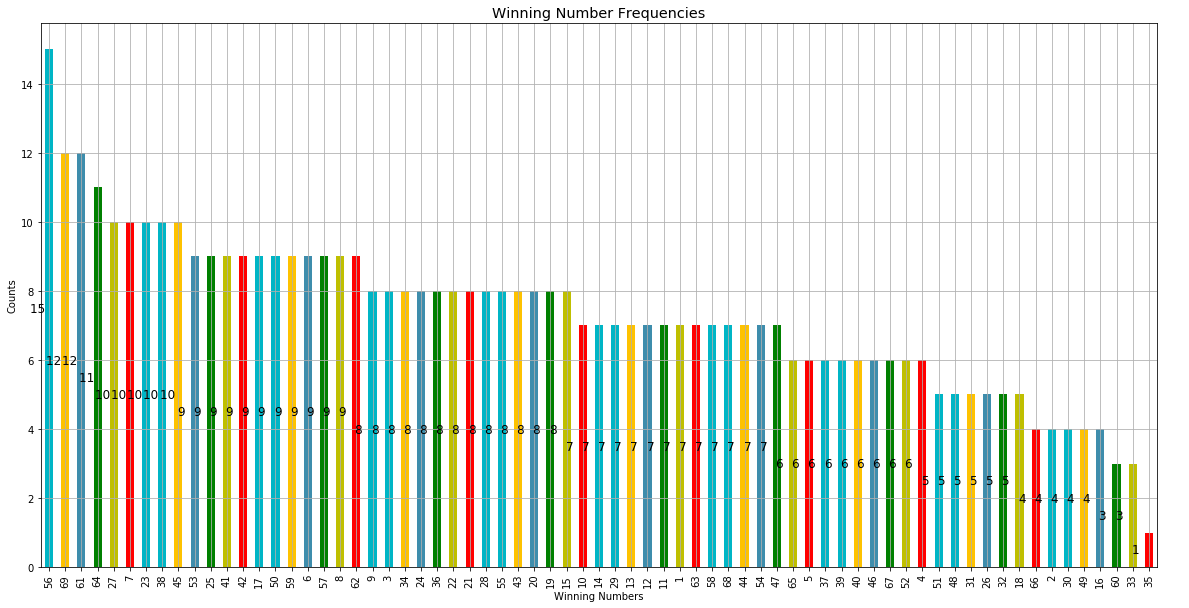

In [6]:
fig = plt.figure()
my_colors = ['#00B5C5','#FEC200','#3E8DAC', 'g', 'y','r']
ax = accnum.plot.bar(stacked=False, figsize=(20,10), grid=True, color=my_colors)

plt.rcParams['font.size'] = 12
plt.title('Winning Number Frequencies')

ax.set_xlabel('Winning Numbers')
ax.set_ylabel('Counts')


labels = []

for i in accnum.index:
        value_str = u"{:<12,}".format(int(accnum.loc[i])) 
        labels.append(value_str)

#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
#        csv = "{:<12,}".format(int(label))
        ax.text(x + width/2+0.5, y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/WinningNum.png')
plt.show()

In [7]:
import random

In [8]:

for i in accnum[accnum>8].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accnum[accnum>8]:
    print ('{:2}'.format(i), end=' ')

56 69 61 64 27  7 23 38 45 53 25 41 42 17 50 59  6 57  8 62  
15 12 12 11 10 10 10 10 10  9  9  9  9  9  9  9  9  9  9  9 

In [9]:

for i in accnum[accnum<=8].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accnum[accnum<=8]:
    print ('{:2}'.format(i), end=' ')

 9  3 34 24 36 22 21 28 55 43 20 19 15 10 14 29 13 12 11  1 63 58 68 44 54 47 65  5 37 39 40 46 67 52  4 51 48 31 26 32 18 66  2 30 49 16 60 33 35  
 8  8  8  8  8  8  8  8  8  8  8  8  8  7  7  7  7  7  7  7  7  7  7  7  7  7  6  6  6  6  6  6  6  6  6  5  5  5  5  5  5  4  4  4  4  4  3  3  1 

# Recommendation 1

In [10]:
recomlist1 = accnum[(accnum>8) & (accnum<11)]
recomlist2 = accnum[accnum<7]
reclist = recomlist1.append(recomlist2)
for i in reclist.index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in reclist:
    print ('{:2}'.format(i), end=' ')

27  7 23 38 45 53 25 41 42 17 50 59  6 57  8 62 65  5 37 39 40 46 67 52  4 51 48 31 26 32 18 66  2 30 49 16 60 33 35  
10 10 10 10 10  9  9  9  9  9  9  9  9  9  9  9  6  6  6  6  6  6  6  6  6  5  5  5  5  5  5  4  4  4  4  4  3  3  1 

In [11]:

recval = list(reclist.index)
for i in range(5):
    print (random.sample(recval, 5))

[38, 42, 17, 7, 50]
[39, 49, 42, 32, 35]
[5, 8, 67, 23, 40]
[8, 52, 48, 60, 62]
[65, 2, 35, 30, 39]


In [12]:
print ('total Number of recommed list {:2}'.format(len(recval)))

total Number of recommed list 39


# Recommendation 2

In [13]:
# choose 2 random numbers from High frequencies ( F > 8 )
reclist1 = list(accnum[accnum>=9].index)
reclist2 = list(accnum[accnum<7].index)
reclist3 = list(accnum[(accnum>=7) & (accnum < 9)].index)
print ('F>9 list {0} '.format(reclist1) )
print ('F<7 list {0}'.format( reclist2) )
print ('7<=F<9 list {0}'.format( reclist3))

for i in range(5):
    rand1 = random.sample(reclist1, 1)
    rand2 = random.sample(reclist2, 2)
    rand3 = random.sample(reclist3, 2)
    rand = rand1 + rand2 + rand3
    rand.sort()
    print (rand)


F>9 list [56, 69, 61, 64, 27, 7, 23, 38, 45, 53, 25, 41, 42, 17, 50, 59, 6, 57, 8, 62] 
F<7 list [65, 5, 37, 39, 40, 46, 67, 52, 4, 51, 48, 31, 26, 32, 18, 66, 2, 30, 49, 16, 60, 33, 35]
7<=F<9 list [9, 3, 34, 24, 36, 22, 21, 28, 55, 43, 20, 19, 15, 10, 14, 29, 13, 12, 11, 1, 63, 58, 68, 44, 54, 47]
[3, 19, 35, 37, 50]
[28, 49, 55, 62, 66]
[5, 8, 14, 16, 55]
[9, 23, 31, 34, 40]
[4, 7, 49, 54, 63]


# Red Number Frequencies 

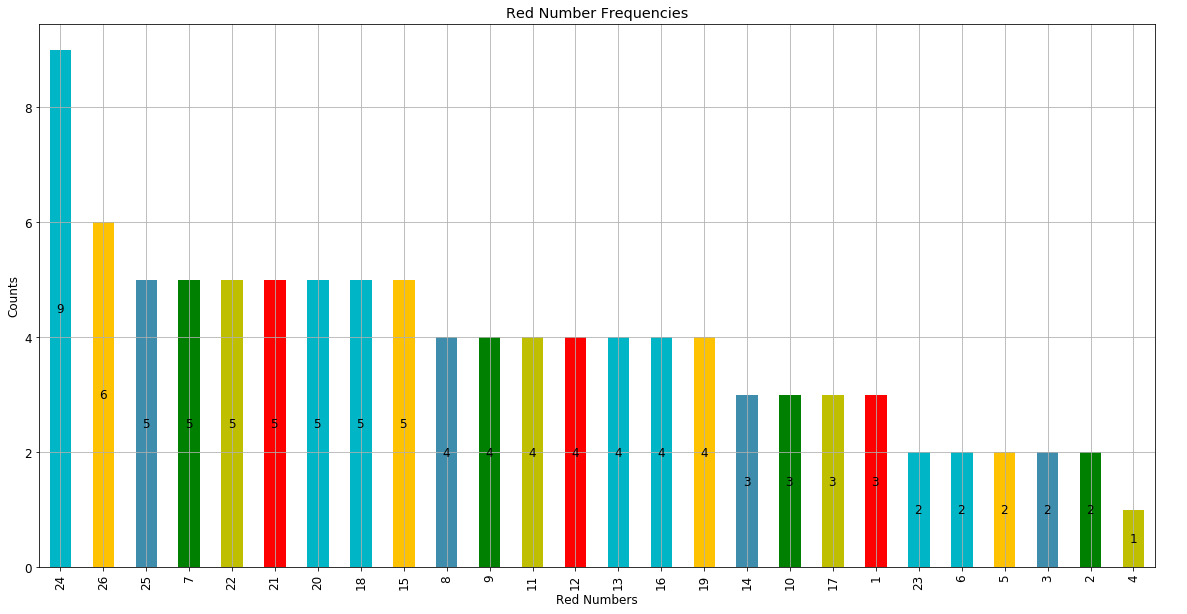

In [14]:
fig = plt.figure()
my_colors = ['#00B5C5','#FEC200','#3E8DAC', 'g', 'y','r']
ax = accred.plot.bar(stacked=False, figsize=(20,10), grid=True, color=my_colors)

plt.rcParams['font.size'] = 12
plt.title('Red Number Frequencies')

ax.set_xlabel('Red Numbers')
ax.set_ylabel('Counts')


labels = []

for i in accred.index:
        value_str = u"{:<12,}".format(int(accred.loc[i])) 
        labels.append(value_str)

#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
#        csv = "{:<12,}".format(int(label))
        ax.text(x + width/2+0.5, y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/RedNum.png')
plt.show()

In [15]:

for i in accred[accred>=5].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accred[accred>=5]:
    print ('{:2}'.format(i), end=' ')

24 26 25  7 22 21 20 18 15  
 9  6  5  5  5  5  5  5  5 

In [16]:

for i in accred[accred<5].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accred[accred<5]:
    print ('{:2}'.format(i), end=' ')

 8  9 11 12 13 16 19 14 10 17  1 23  6  5  3  2  4  
 4  4  4  4  4  4  4  3  3  3  3  2  2  2  2  2  1 

# Recommendation Red Numer

In [19]:
for i in range(5):
    print (random.sample(list(accred[accred>=4].index), 1))
    

[24]
[8]
[22]
[24]
[15]
